In [1]:
## Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [10]:
data = pd.read_csv(r'C:\Users\lenovo\Downloads\zomato.csv',encoding='ISO-8859-1')

In [12]:

data_country = pd.read_excel(r'C:\Users\lenovo\Downloads\Country-Code.xlsx')


In [14]:

data.head(2)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591


In [15]:

data_country.head()

,Country Code,Country
0,1,India
1,14,Australia
2,30,Brazil
3,37,Canada
4,94,Indonesia


In [16]:
## Check all the attributes of the dataset
data.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [17]:
## Check the data types and non-null values of all columns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [18]:
## Check the Descriptive Statistics
data.describe()

,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
count,9.551000e+03,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000
mean,9.051128e+06,18.365616,64.126574,25.854381,1199.210763,1.804837,2.666370,156.909748
std,8.791521e+06,56.750546,41.467058,11.007935,16121.183073,0.905609,1.516378,430.169145
min,5.300000e+01,1.000000,-157.948486,-41.330428,0.000000,1.000000,0.000000,0.000000
25%,3.019625e+05,1.000000,77.081343,28.478713,250.000000,1.000000,2.500000,5.000000
50%,6.004089e+06,1.000000,77.191964,28.570469,400.000000,2.000000,3.200000,31.000000
75%,1.835229e+07,1.000000,77.282006,28.642758,700.000000,2.000000,3.700000,131.000000
max,1.850065e+07,216.000000,174.832089,55.976980,800000.000000,4.000000,4.900000,10934.000000


## In Data Analysis What We Can Do is
1. Missing Values
2. Explore About Numerical Variables
3. Explore About Categorical Variables
4. Finding Relationship Between Features

In [19]:
## Finding Missing Values
data.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [20]:
features_with_na = [feature for feature in data.columns if data[feature].isnull().sum()>0]
print(features_with_na)

['Cuisines']


In [21]:
## Merge both the files on Country Code
pd.set_option("display.max_columns",None)
final_df = pd.merge(data, data_country, on="Country Code", how="left")
final_df.head(1)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",1100,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314,Phillipines


In [22]:
final_df.dtypes

Restaurant ID             int64
Restaurant Name          object
Country Code              int64
City                     object
Address                  object
Locality                 object
Locality Verbose         object
Longitude               float64
Latitude                float64
Cuisines                 object
Average Cost for two      int64
Currency                 object
Has Table booking        object
Has Online delivery      object
Is delivering now        object
Switch to order menu     object
Price range               int64
Aggregate rating        float64
Rating color             object
Rating text              object
Votes                     int64
Country                  object
dtype: object

Country
India             8652
United States      434
United Kingdom      80
Brazil              60
UAE                 60
South Africa        60
New Zealand         40
Turkey              34
Australia           24
Phillipines         22
Indonesia           21
Singapore           20
Qatar               20
Sri Lanka           20
Canada               4
Name: count, dtype: int64


([<matplotlib.patches.Wedge at 0x211e6c8a8e0>,
 [Text(-1.0829742700952103, 0.19278674827836725, 'India'),
  Text(1.077281715838356, -0.22240527134123297, 'United States'),
  Text(1.0995865153823035, -0.03015783794312073, 'United Kingdom')],
 [Text(-0.590713238233751, 0.10515640815183668, '94.39%'),
  Text(0.5876082086391032, -0.12131196618612707, '4.73%'),
  Text(0.5997744629358018, -0.01644972978715676, '0.87%')])

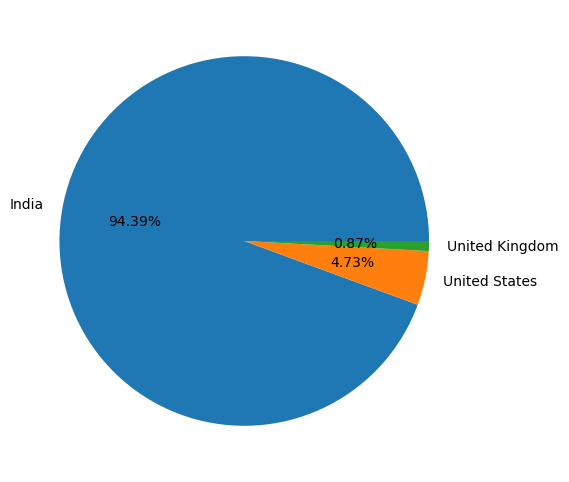

In [23]:
## Exploring Zomato Trnsactions Country wise
import matplotlib
print(final_df.Country.value_counts())
country_names = final_df.Country.value_counts().index
country_vals = final_df.Country.value_counts().values
matplotlib.rcParams["figure.figsize"]=(12,6)
plt.pie(country_vals[:3], labels=country_names[:3],autopct='%1.2f%%')

### Observation :
Major amount of transactions are from india (almost 94.39%) follwed by United States (4.73%) and United Kingdom (0.87%)

In [24]:
final_df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes', 'Country'],
      dtype='object')

In [25]:
ratings = final_df.groupby(['Aggregate rating','Rating color','Rating text']).size().reset_index().rename(columns={0:"Rating Count"})
ratings

,Aggregate rating,Rating color,Rating text,Rating Count
0,0.0,White,Not rated,2148
1,1.8,Red,Poor,1
2,1.9,Red,Poor,2
3,2.0,Red,Poor,7
4,2.1,Red,Poor,15
5,2.2,Red,Poor,27
6,2.3,Red,Poor,47
7,2.4,Red,Poor,87
8,2.5,Orange,Average,110
9,2.6,Orange,Average,191


#### Observation:
1. When Rating is between 4.5 to 4.9 ----> Excellent
2. When Rating is between 4.0 to 4.4 ----> Very Good
3. When Rating is between 3.5 to 3.9 ----> Good
4. When Rating is between 2.5 to 3.4 ----> Average
5. When Rating is between 1.8 to 2.4 ----> Poor
6. When Rating is 0 ----> Not Rated

<Axes: xlabel='Aggregate rating', ylabel='Rating Count'>

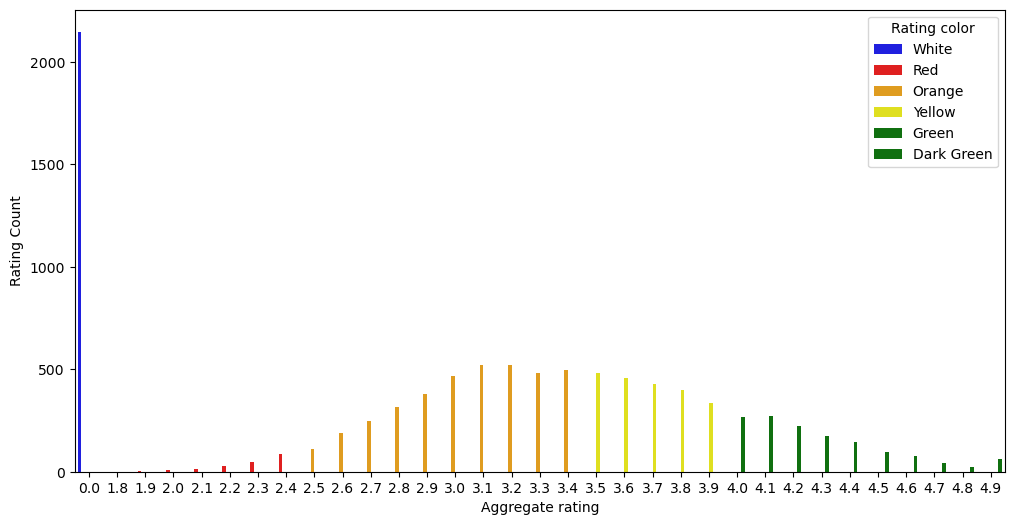

In [26]:
sns.barplot(x="Aggregate rating",y="Rating Count",hue="Rating color",data=ratings,palette=["blue","red","orange","yellow","green","green"])

#### Observations:
1. Not Rated count is very high
2. Maximum number of rating are between 2.9 to 3.9

<Axes: xlabel='Rating color', ylabel='count'>

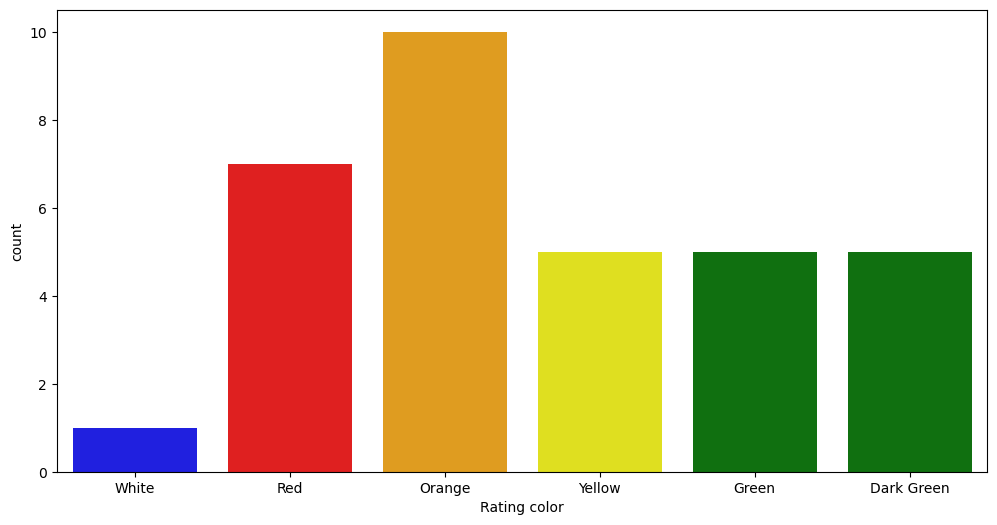

In [27]:
## Count Plot
sns.countplot(x="Rating color",data=ratings,palette=["blue","red","orange","yellow","green","green"])

In [28]:
final_df["Country"].loc[final_df["Aggregate rating"] == 0.0].value_counts()

Country
India             2139
Brazil               5
United States        3
United Kingdom       1
Name: count, dtype: int64

In [29]:
final_df[final_df["Aggregate rating"] == 0.0].groupby("Country").size().reset_index()

,Country,0
0,Brazil,5
1,India,2139
2,United Kingdom,1
3,United States,3


#### Observations:
Maximum number of 0 ratings are from Indian customers

In [30]:
## Which currency is used by which country?
final_df.groupby(["Country","Currency"]).size().reset_index()

,Country,Currency,0
0,Australia,Dollar($),24
1,Brazil,Brazilian Real(R$),60
2,Canada,Dollar($),4
3,India,Indian Rupees(Rs.),8652
4,Indonesia,Indonesian Rupiah(IDR),21
5,New Zealand,NewZealand($),40
6,Phillipines,Botswana Pula(P),22
7,Qatar,Qatari Rial(QR),20
8,Singapore,Dollar($),20
9,South Africa,Rand(R),60


In [31]:
## Countries do have online deliveries option
final_df["Country"].loc[final_df["Has Online delivery"]=="Yes"].value_counts()

Country
India    2423
UAE        28
Name: count, dtype: int64

In [32]:
final_df.groupby(["Country","Has Online delivery"]).size().reset_index()

,Country,Has Online delivery,0
0,Australia,No,24
1,Brazil,No,60
2,Canada,No,4
3,India,No,6229
4,India,Yes,2423
5,Indonesia,No,21
6,New Zealand,No,40
7,Phillipines,No,22
8,Qatar,No,20
9,Singapore,No,20


#### Observations:
 Online deliveries are available in India and UAE

([<matplotlib.patches.Wedge at 0x211e72bf130>,
 [Text(-0.6145352824185932, 0.9123301960708633, 'New Delhi'),
  Text(0.0623675251198054, -1.0982305276263407, 'Gurgaon'),
  Text(0.8789045225625368, -0.6614581167535246, 'Noida'),
  Text(1.0922218418223437, -0.13058119407559224, 'Faridabad'),
  Text(1.099946280005612, -0.010871113182029924, 'Ghaziabad')],
 [Text(-0.3352010631374145, 0.497634652402289, '68.87%'),
  Text(0.0340186500653484, -0.5990348332507311, '14.07%'),
  Text(0.47940246685229276, -0.36079533641101336, '13.59%'),
  Text(0.5957573682667329, -0.07122610585941394, '3.16%'),
  Text(0.5999706981848791, -0.005929698099289049, '0.31%')])

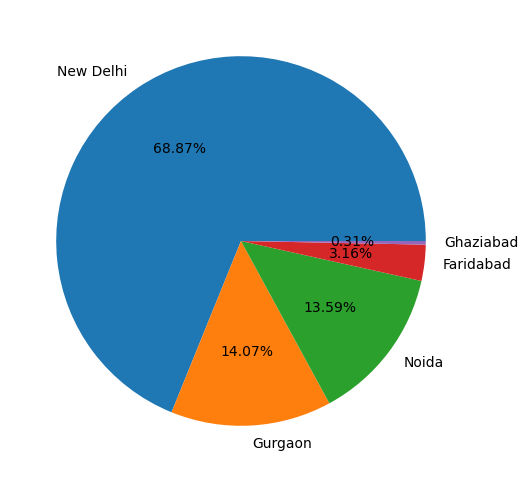

In [33]:
## top 5 cities distribution
city_names = final_df["City"].value_counts().index
city_vals = final_df["City"].value_counts().values
plt.pie(city_vals[:5],labels=city_names[:5],autopct="%1.2f%%")

#### Observation:
New Delhi city has wide usage of zomato followed by Gurgaon and Noida

([<matplotlib.patches.Wedge at 0x211e7317b80>,
 [Text(0.7383739846958008, 0.8153550507137645, 'North Indian'),
  Text(-0.5794679314239953, 0.9349956772366362, 'North Indian, Chinese'),
  Text(-1.067309479615702, 0.26617752482593154, 'Chinese'),
  Text(-1.0185984499802057, -0.4152796620326146, 'Fast Food'),
  Text(-0.5935788454809928, -0.9261015895664211, 'North Indian, Mughlai'),
  Text(-0.005887079599915552, -1.0999842463843672, 'Cafe'),
  Text(0.4842062514572988, -0.9876964645323336, 'Bakery'),
  Text(0.808736477166136, -0.7456174022251013, 'North Indian, Mughlai, Chinese'),
  Text(1.0055375294202338, -0.44597564611473206, 'Bakery, Desserts'),
  Text(1.090298995560443, -0.14576728123927227, 'Street Food')],
 [Text(0.4027494461977095, 0.4447391185711442, '26.58%'),
  Text(-0.316073417140361, 0.5099976421290743, '14.51%'),
  Text(-0.5821688070631101, 0.14518774081414446, '10.05%'),
  Text(-0.5555991545346576, -0.22651617929051704, '10.05%'),
  Text(-0.32377027935326874, -0.505146321581

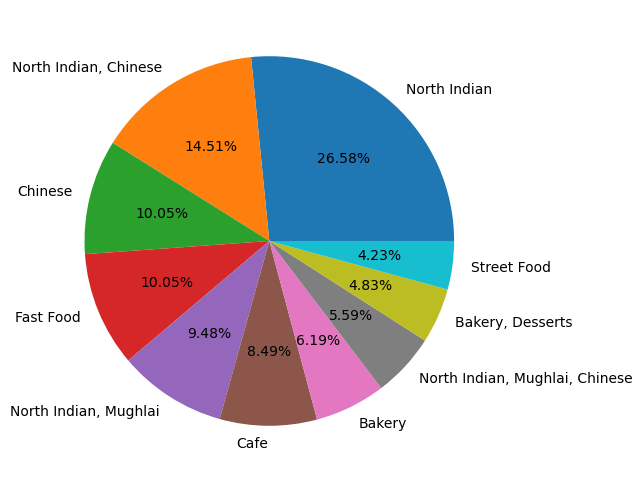

In [34]:
## The top 10 Cuisines
cuisine_names = final_df["Cuisines"].value_counts().index
cuisine_vals = final_df["Cuisines"].value_counts().values
plt.pie(cuisine_vals[:10],labels=cuisine_names[:10],autopct="%1.2f%%")

#### Observation:
North Indian,Chinese is the most ordered and served cuisine among all followed by  Chinese and Fast Food

In [35]:
final_df["Is delivering now"].value_counts()

Is delivering now
No     9517
Yes      34
Name: count, dtype: int64

#### Observation:
Out of 9551 restaurants only 34 restaurants are delivering now

In [36]:
final_df.groupby(["Has Online delivery","Is delivering now"]).size().reset_index()

,Has Online delivery,Is delivering now,0
0,No,No,7100
1,Yes,No,2417
2,Yes,Yes,34


#### Observations:
1. Outof 9551 restaurants 7100 restaurants are not providing online delivery facility
2. From those who have online delivery facility, only 34 restaurants are delivering now.

#### Droping Unnecessary columns
From above observation we can say there are many features which is not required and they are object type and there uniques values are large in quantities so let's find them and remove them 

In [49]:

object_col = final_df.select_dtypes(include=object).columns.tolist()
for col in object_col:
    print(final_df[col].value_counts(dropna=False)/final_df.shape[0],'\n')

Restaurant Name
Cafe Coffee Day             0.008690
Domino's Pizza              0.008271
Subway                      0.006596
Green Chick Chop            0.005340
McDonald's                  0.005026
                              ...   
Odeon Social                0.000105
Johnny Rockets              0.000105
House of Commons            0.000105
HotMess                     0.000105
Walter's Coffee Roastery    0.000105
Name: count, Length: 7446, dtype: float64 

City
New Delhi           0.573029
Gurgaon             0.117056
Noida               0.113077
Faridabad           0.026280
Ghaziabad           0.002618
                      ...   
Panchkula           0.000105
Mc Millan           0.000105
Mayfield            0.000105
Macedon             0.000105
Vineland Station    0.000105
Name: count, Length: 141, dtype: float64 

Address
Dilli Haat, INA, New Delhi                                                               0.001152
Sector 41, Noida                                            

In [62]:
final_df.drop(['Restaurant Name','City','Address','Locality','Locality Verbose','Cuisines'],axis=1,inplace=True)

In [64]:
final_df=final_df.drop(['Restaurant ID','Votes'],axis=1)

In [65]:
final_df.head()

,Country Code,Longitude,Latitude,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Country
0,162,121.027535,14.565443,1100,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,Phillipines
1,162,121.014101,14.553708,1200,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,Phillipines
2,162,121.056831,14.581404,4000,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,Phillipines
3,162,121.056475,14.585318,1500,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,Phillipines
4,162,121.057508,14.584450,1500,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,Phillipines


In [69]:
from sklearn.preprocessing import LabelEncoder


In [72]:
final_df=final_df.apply(LabelEncoder().fit_transform)

<Axes: >

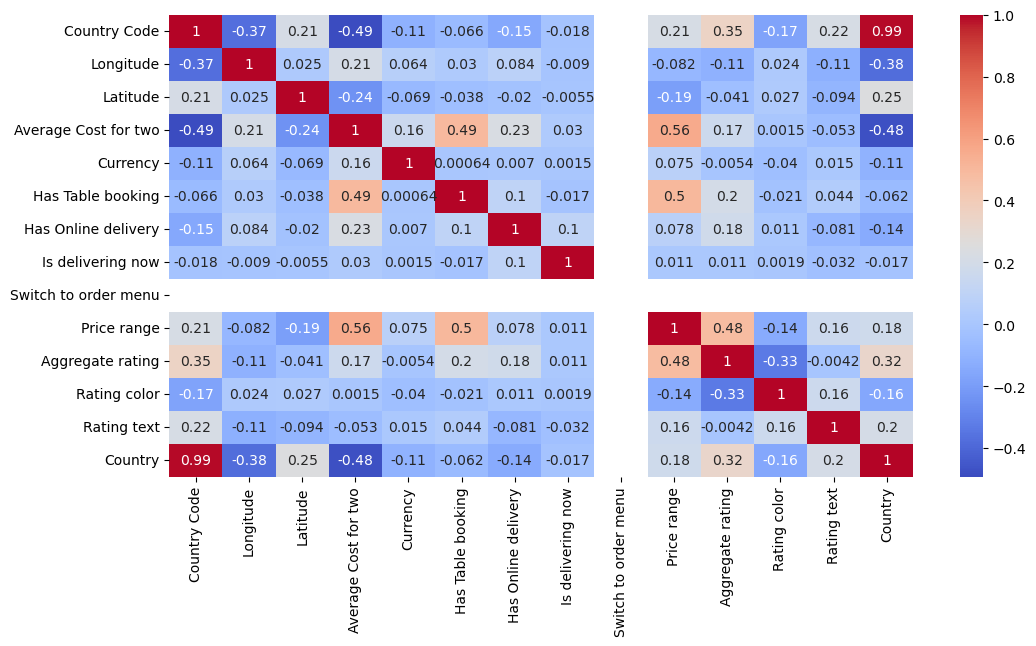

In [73]:
plt.figure(figsize=(12,6))
sns.heatmap(final_df.corr(),cmap='coolwarm',annot=True)

### Problem statement :



### 1) Average Cost for two
From correlation we can see when label is Average Cost for two that Country Code , latitude and Country this three features
are not contributing therefore we will drop for this label prediction

In [74]:
X=final_df.drop(['Average Cost for two','Country Code','Latitude','Country'],axis=1)
Y=final_df['Average Cost for two']

In [75]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

In [76]:
#LinearRegression Model
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train,y_train)
pred=lr.predict(X_test)

from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

MAE: 11.3654996658196
MSE: 238.1581615014184
RMSE: 15.432373812910908


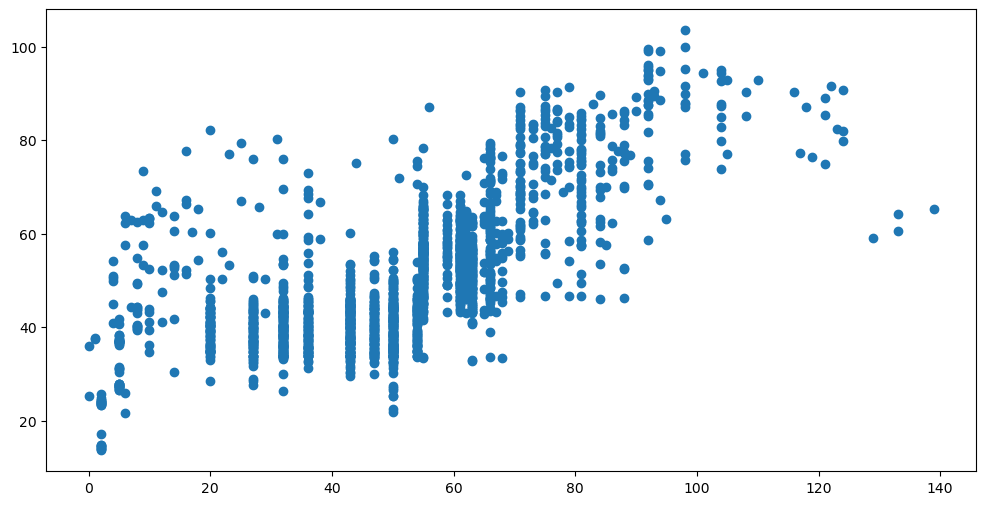

In [77]:

plt.scatter(x=y_test,y=pred)

In [ ]:
#Not straight line lets try another models

Text(0, 0.5, 'Predicted Y')

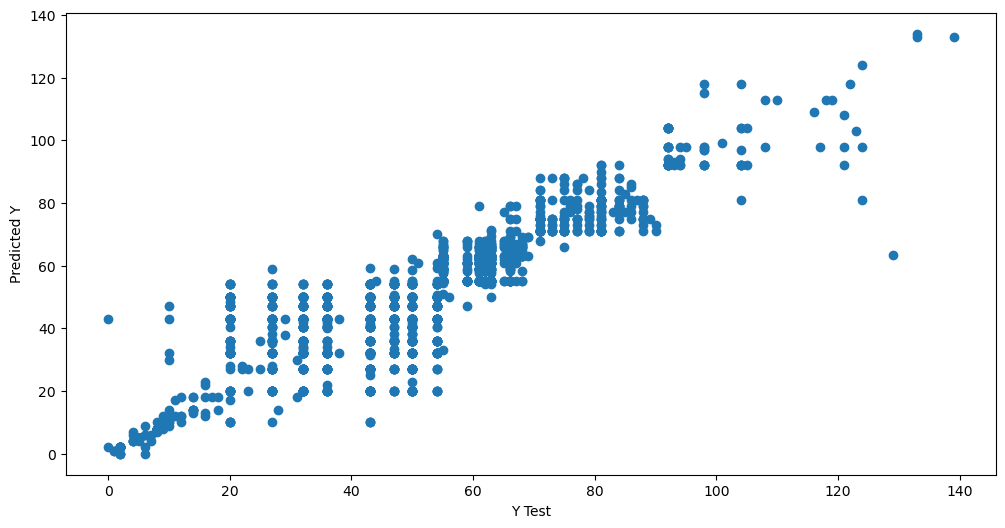

In [78]:
#DecisionTreeRegressor Model
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor()
dtr.fit(X_train,y_train)
pred=dtr.predict(X_test)

plt.scatter(x=y_test,y=pred)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [80]:
#Straight line means better than Linear Regression Model

In [79]:
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

MAE: 7.1459757785108735
MSE: 107.43260213579262
RMSE: 10.364969953443794


In [81]:
#RandomForestRegressor model
from sklearn.ensemble import RandomForestRegressor
rdr = RandomForestRegressor()
rdr.fit(X_train,y_train)
pred=rdr.predict(X_test)

In [82]:
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

MAE: 6.187471050257866
MSE: 73.83071674014586
RMSE: 8.592480243803058


In [83]:
#RMSE is lower than the two previous models, so the RandomForest Regressor is the best model in this case.

### Actual Vs Predicted sample

C:\Users\lenovo\anaconda3\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


,Y Test,Pred
4731,47,40.50
1468,63,60.51
9037,59,57.02
7866,32,42.75
5570,50,45.91


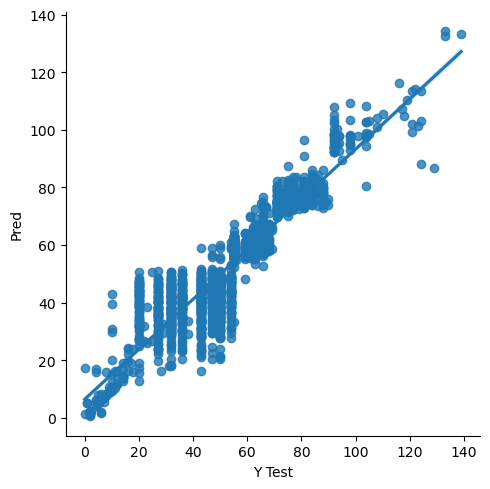

In [84]:
data = pd.DataFrame({'Y Test':y_test , 'Pred':pred},columns=['Y Test','Pred'])
sns.lmplot(x='Y Test',y='Pred',data=data,palette='rainbow')
data.head()

### Problem Statement

### 2) Price range
From correlation we can see when label is Price range that Rating colour this feature
are not contributing therefore we will drop for this label prediction


In [85]:
X=final_df.drop(['Rating color','Price range'],axis=1)
Y=final_df['Price range']

In [86]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

In [87]:
#LinearRegression Model
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train,y_train)
pred=lr.predict(X_test)

from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

MAE: 0.3516020454211253
MSE: 0.22464051120924447
RMSE: 0.47396256308831447


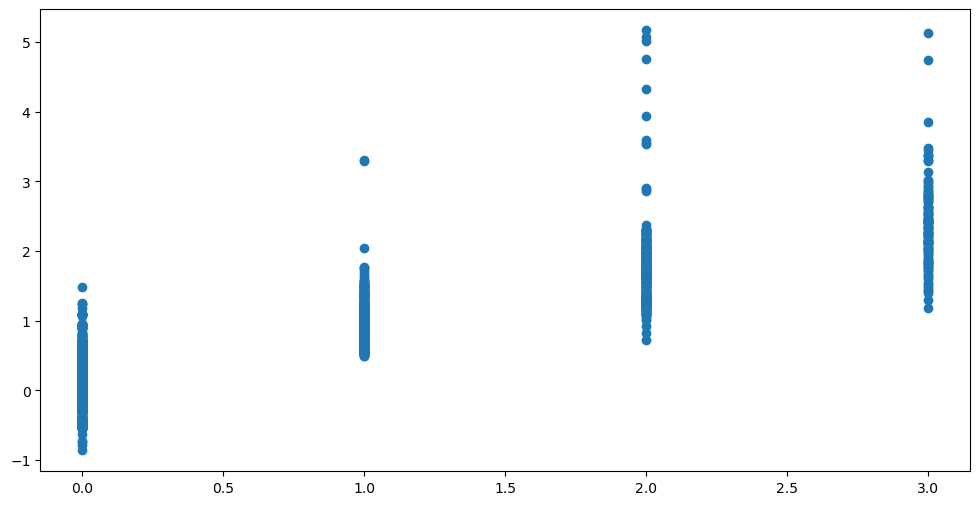

In [88]:

plt.scatter(x=y_test,y=pred)

In [89]:
#Not straight line lets try another models

Text(0, 0.5, 'Predicted Y')

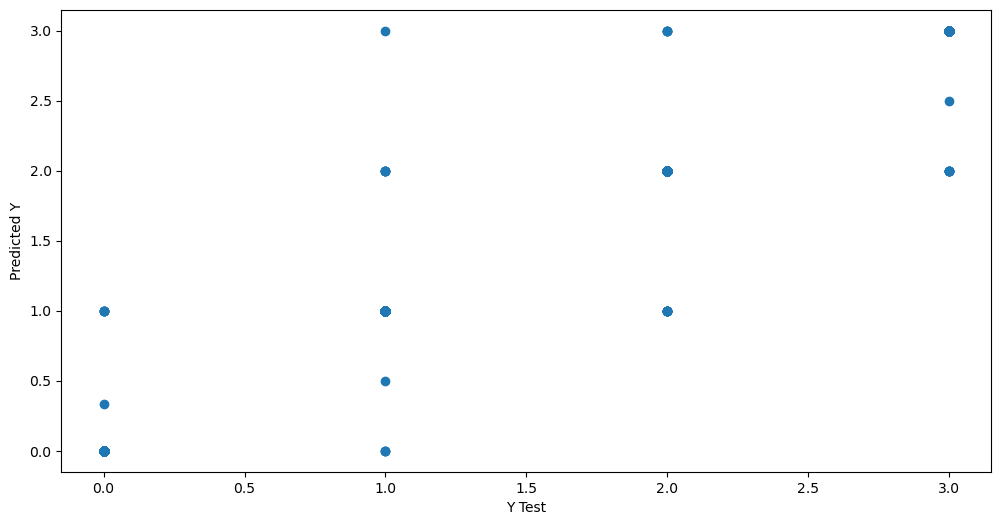

In [90]:
#DecisionTreeRegressor Model
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor()
dtr.fit(X_train,y_train)
pred=dtr.predict(X_test)

plt.scatter(x=y_test,y=pred)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [91]:
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

MAE: 0.019012733298447586
MSE: 0.01968137682423397
RMSE: 0.14029033047303713


In [92]:
#RandomForestRegressor model
from sklearn.ensemble import RandomForestRegressor
rdr = RandomForestRegressor()
rdr.fit(X_train,y_train)
pred=rdr.predict(X_test)

In [93]:
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

MAE: 0.02705068400986768
MSE: 0.015814248326759626
RMSE: 0.12575471492854504


In [94]:
#RMSE is lower than the two previous models, so the RandomForest Regressor is the best model in this case.

# ACTUAL VS PREDICTED VALUE

C:\Users\lenovo\anaconda3\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


,Y Test,Pred
4731,0,0.0
1468,1,1.0
9037,1,1.0
7866,0,0.0
5570,0,0.0


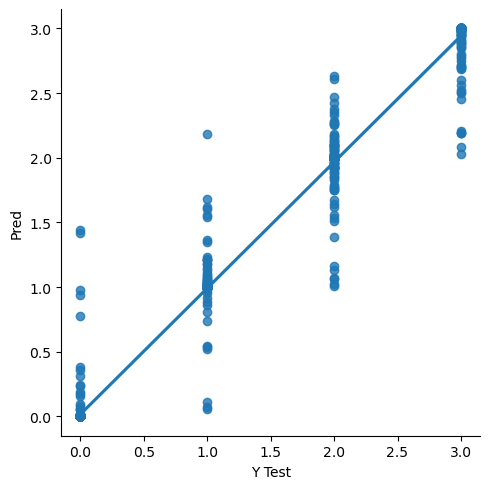

In [95]:
data = pd.DataFrame({'Y Test':y_test , 'Pred':pred},columns=['Y Test','Pred'])
sns.lmplot(x='Y Test',y='Pred',data=data,palette='rainbow')
data.head()